In [44]:
import pandas as pd

In [45]:
k = pd.read_csv("C:/Users/Kaustubh.DESKTOP-6MT3302/Desktop/Dataset/Datasets/heart.csv")

In [46]:
k.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [48]:
k[["output"]].value_counts()

output
1         165
0         138
dtype: int64

In [49]:
import matplotlib.pyplot as plt
import seaborn as sb

In [50]:
k.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

C:\Users\Kaustubh.DESKTOP-6MT3302\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thall', ylabel='output'>

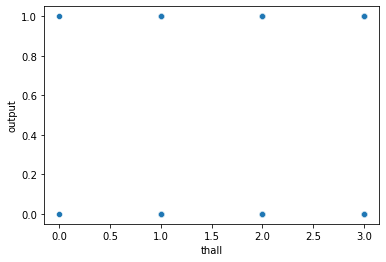

In [51]:
sb.scatterplot(k.thall,k.output)

In [52]:
k.corr()[["output"]]

,output
age,-0.225439
sex,-0.280937
cp,0.433798
trtbps,-0.144931
chol,-0.085239
fbs,-0.028046
restecg,0.137230
thalachh,0.421741
exng,-0.436757
oldpeak,-0.430696


In [53]:
Y = k[["output"]]

In [54]:
X = k.drop(labels=["output"],axis=1)

In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [56]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=17)
model = dt.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

0.22950819672131148

In [57]:
for i in range(2,10,1):
    from sklearn.tree import DecisionTreeRegressor
    dt = DecisionTreeRegressor(random_state=17, min_samples_leaf=i)
    model = dt.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    print(i,mean_absolute_error(ytest,pred))

2 0.30601092896174864
3 0.22978142076502733
4 0.23134270101483217
5 0.21198282591725218
6 0.24156908665105387
7 0.2445265117396265
8 0.25358089087597285
9 0.20449431635545423


In [58]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=17, min_samples_leaf=9)
model = dt.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(ytest,pred))

0.20449431635545423


In [59]:
from sklearn.ensemble import RandomForestRegressor
    
rfr = RandomForestRegressor(random_state=17,n_estimators=2)
model = rfr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(ytest,pred))

0.2540983606557377


<ipython-input-59-29351baffbc7>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rfr.fit(xtrain,ytrain)
